# Boxplot

## Objetivo: Entender o conceito e construção de um boxplot, a partir de dados numéricos.

In [1]:
import os
import pandas as pd

repo_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
file_patch = os.path.join(repo_dir, "materiais", "survey_results_public.csv")
df = pd.read_csv(file_patch, index_col="ResponseId")
df

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,5,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,5,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,33,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_context('poster')

Agora, vamos nos voltar a diferentes gráficos de distribuições dos nossos dados. Iniciaremos com um boxplot.

Primeiramente, vamos retomar a distribuição dos nossos dados da coluna `"WorkExp"` com `df.describe()`:

In [3]:
df['WorkExp'].describe().round(2)

count    36769.00
mean        10.24
std          8.71
min          0.00
25%          4.00
50%          8.00
75%         15.00
max         50.00
Name: WorkExp, dtype: float64

Podemos interpretar essa distribuição visualmente a partir de um **boxplot**.

### Boxplot

Gráfico que exibe a distribuição básica de um conjunto de valores.

O boxplot deixa explícita a posição dos quartis:
- Q1 = 25%
- Q2 (mediana) = 50%
- Q3 = 75%

Além disso, também anota os outliers da distribuição.

Vamos plotar um boxplot dos anos de experiência de trabalho (coluna `WorkExp`) a partir da função `sns.boxplot()`:

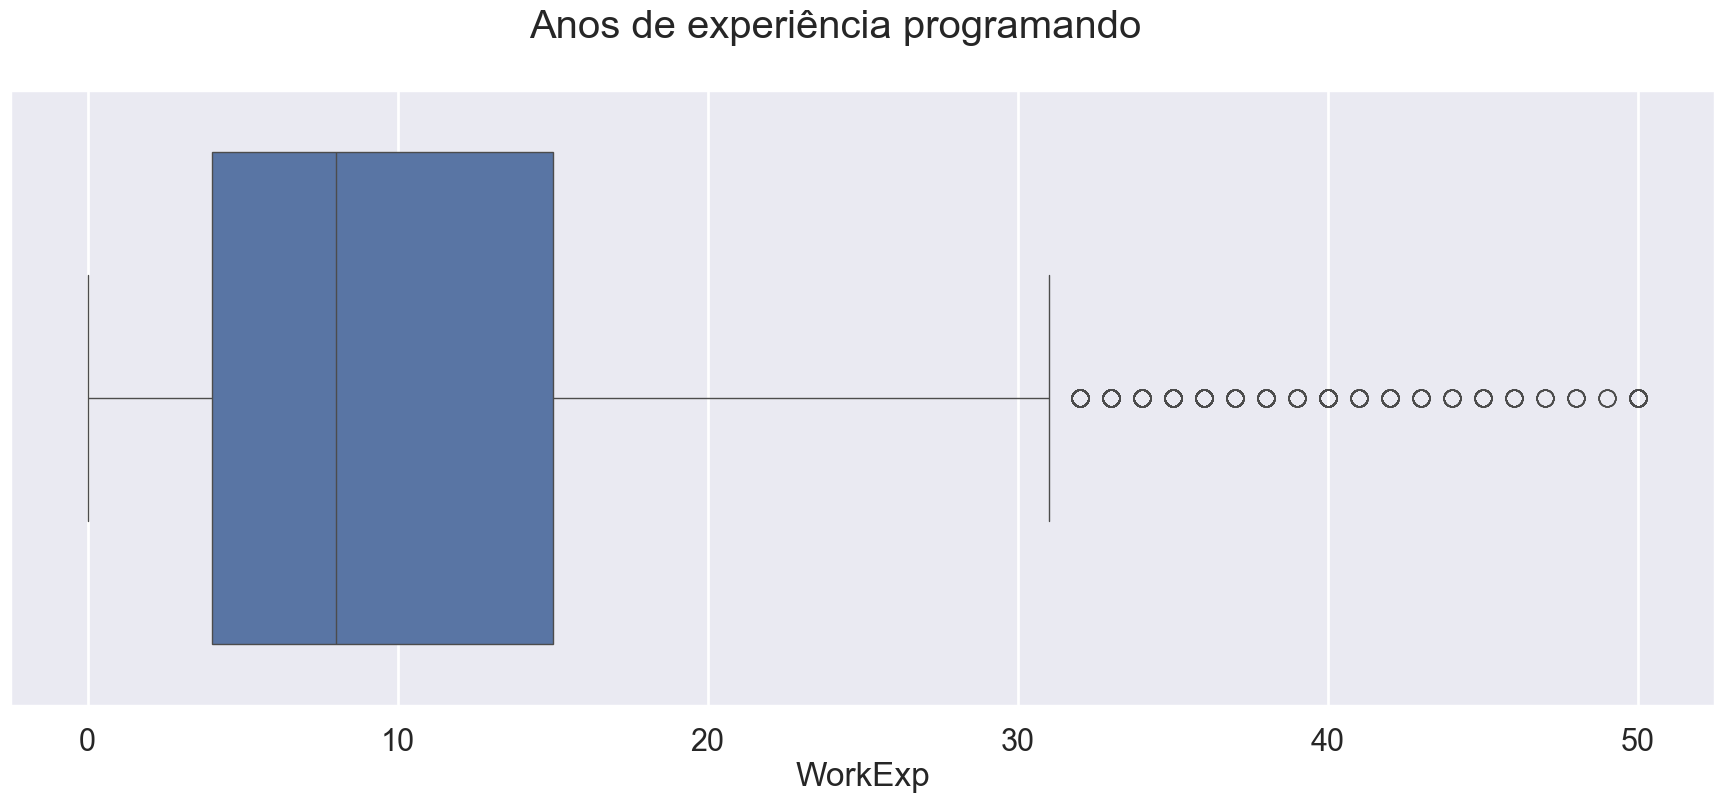

In [4]:
fig, ax = plt.subplots(figsize=(22, 8))

sns.boxplot(data=df, ax=ax, x='WorkExp')
fig.suptitle('Anos de experiência programando')

plt.show()

Os valores dos quantis Q1, Q2 (mediana) e Q3 do boxplot estão batendo com os valores calculados!

### Outliers
Note que muitos outliers foram encontrados. Por padrão, o seaborn usa as **cercas de Tukey** (*Tukey fences*) para determinar outliers.

Esse método usa a **distância interquartil** (IQR) para definir o ponto de corte. Valores que estiverem a uma distância maior que `1.5 * IQR` de Q3 são considerados outliers.

Conseguimos controlar o fator de multiplicação usando o parâmetro `whis`:

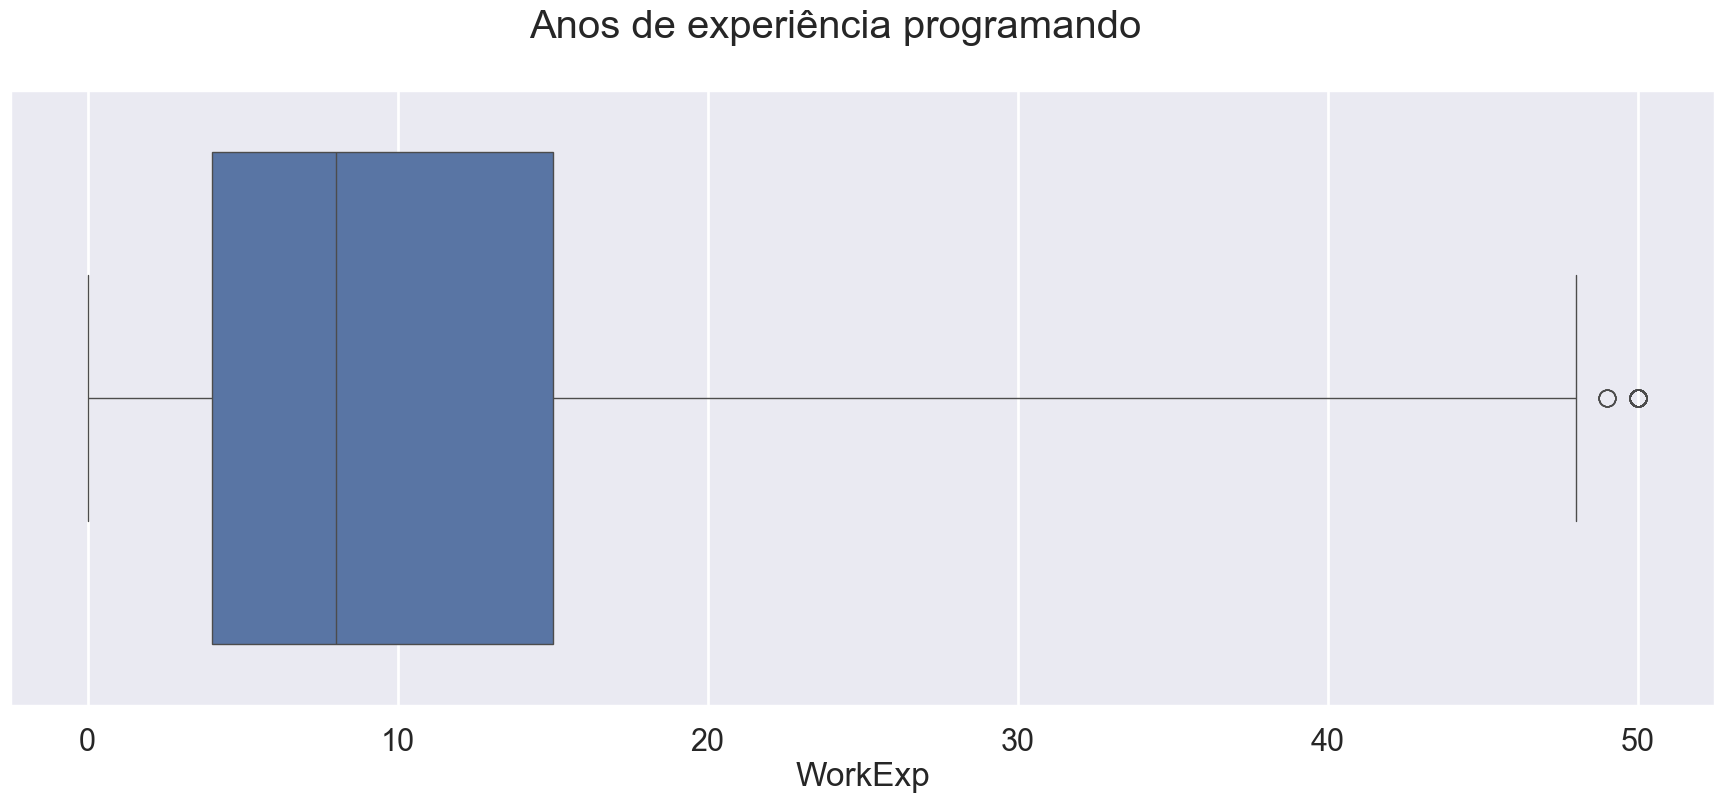

In [5]:
fig, ax = plt.subplots(figsize=(22, 8))

sns.boxplot(data=df, ax=ax, x='WorkExp', whis=3.0)
fig.suptitle('Anos de experiência programando')

plt.show()

Que valor de `whis` utilizar? Vai depender do seu entendimento e conhecimento dos seus dados.

Existem outros métodos de determinação de outliers - na realidade, o estudo de detecção de outliers é todo um campo dentro da estatística. Isto vai além do escopo deste curso, mas é importante saber que as cercas de Tukey nem sempre são adequadas para isso. Na realidade, as cercas costumam funcionar melhor em dados simétricos, o que não é o caso da coluna `WorkExp`!

### Adicionando dados ao boxplot

O boxplot está ok, porém não conseguimos ver a posição dos dados individuais nele. Vamos mudar isso adicionando uma segunda chamada ao seaborn, dessa vez utilizando o `sns.scatterplot()` para plotarmos os dados individuais:

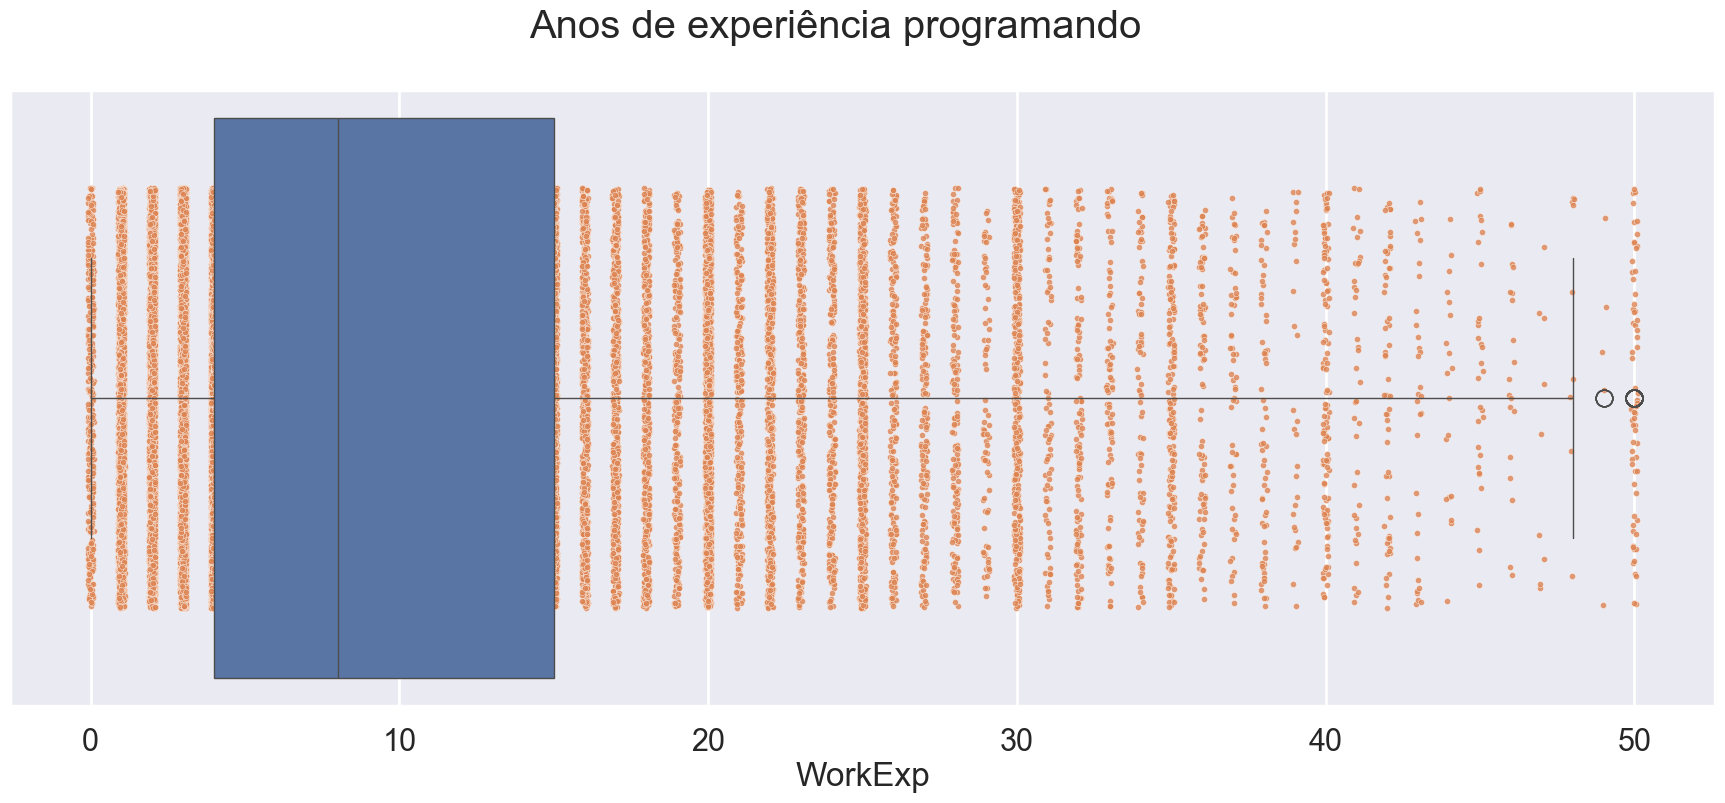

In [6]:
import numpy as np

# Precisamos de um pouco de ruído no eixo X para os dados não ficarem exatamente no mesmo ponto
x_noise = np.random.uniform(-0.1, 0.1, len(df))
x_scatter = df['WorkExp'] + x_noise

# Mesma coisa para o eixo Y (graficamente, o boxplot está na posição Y = 0)
y_scatter = np.random.uniform(-0.3, 0.3, len(df))

fig, ax = plt.subplots(figsize=(22, 8))

sns.boxplot(data=df, ax=ax, x='WorkExp', whis=3.0)
sns.scatterplot(data=df, ax=ax, x=x_scatter, y=y_scatter, alpha=0.8, s=20)
fig.suptitle('Anos de experiência programando')

plt.show()

Agora sim! A concentração dos dados nos valores mais baixos agora está visualmente mais clara.